In [51]:
import requests
import json
import re
from datetime import datetime

In [52]:
nombre_software = 'Facebook' #coloca el nombre de tu software

In [53]:
MITRE_API_URL = 'https://cve.circl.lu/api/cve/' #uso api Mitre

In [54]:
cve_ids = ['CVE-2016-3333'] #cves

In [55]:
#Funcion de consumo a la api de MITRE
def obtener_datos_mitre(cve_id):
    """
    Busca información sobre la vulnerabilidad en MITRE y extrae hasta tres CVEs relacionados si los hay.
    """
    url = f'{MITRE_API_URL}{cve_id}'
    try:
        print(f"Buscando información de la vulnerabilidad en MITRE: {cve_id}")
        response = requests.get(url)
        response.raise_for_status()
        cve_data = response.json()

       
        description = cve_data.get('summary', 'Descripción no disponible')

        # Buscar otros CVEs mencionados en la descripción
        cves_encontrados = re.findall(r'CVE-\d{4}-\d{4,7}', description)

        # Limitar a los primeros tres CVEs encontrados
        cves_relacionados = cves_encontrados[:3]

        return {
            "CVE": cve_id,
            "Descripcion": description,
            "CVEs_Relacionados": cves_relacionados
        }
    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la información de la vulnerabilidad en MITRE: {e}')
        return None

datos_json = {
    "nombre_software": nombre_software,
    "date": datetime.now().strftime("%Y-%m-%d"),
    "vulnerabilidades": []
}





In [56]:
"""
La función consulta la API de MITRE usando un identificador CVE para obtener información sobre una vulnerabilidad.
Después, analiza la descripción de la vulnerabilidad en busca de otros CVEs mencionados y los añade al resultado. 
Se ejecuta un bucle sobre una lista de identificadores CVE, agregando la información de cada vulnerabilidad al diccionario de resultados.
Esto permite recopilar información sobre vulnerabilidades específicas y encontrar otras relacionadas.
"""

'\nLa función consulta la API de MITRE usando un identificador CVE para obtener información sobre una vulnerabilidad.\nDespués, analiza la descripción de la vulnerabilidad en busca de otros CVEs mencionados y los añade al resultado. \nSe ejecuta un bucle sobre una lista de identificadores CVE, agregando la información de cada vulnerabilidad al diccionario de resultados.\nEsto permite recopilar información sobre vulnerabilidades específicas y encontrar otras relacionadas.\n'

In [57]:
for cve_id in cve_ids:
    cve_info = obtener_datos_mitre(cve_id)
    if cve_info:
        datos_json["vulnerabilidades"].append(cve_info)

Buscando información de la vulnerabilidad en MITRE: CVE-2016-3333


In [58]:
#Guardar la información en un archivo JSON
with open('vulnerabilidades.json', 'w') as file:
    json.dump(datos_json, file, indent=4)

In [59]:
print("Proceso terminado. Los resultados se han guardado en el archivo 'vulnerabilidades.json'.")

Proceso terminado. Los resultados se han guardado en el archivo 'vulnerabilidades.json'.


Buscando información de la vulnerabilidad en MITRE: CVE-2016-3333


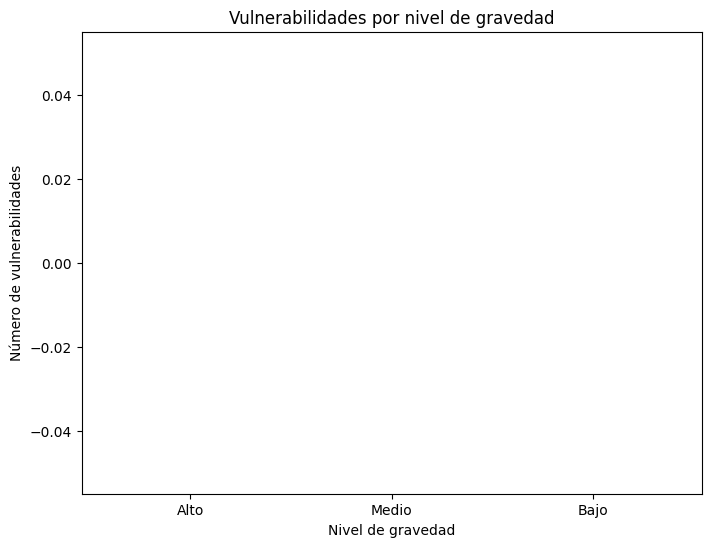

In [66]:
import requests
import json
import re
from datetime import datetime
import matplotlib.pyplot as plt

nombre_software = 'MySQL'  # Nombre del software
MITRE_API_URL = 'https://cve.circl.lu/api/cve/'  # URL de la API de MITRE
cve_ids = ['CVE-2016-3333']  # CVEs

# Función para obtener datos de la API de MITRE
def obtener_datos_mitre(cve_id):
    url = f'{MITRE_API_URL}{cve_id}'
    try:
        print(f"Buscando información de la vulnerabilidad en MITRE: {cve_id}")
        response = requests.get(url)
        response.raise_for_status()
        cve_data = response.json()

        description = cve_data.get('summary', 'Descripción no disponible')

        # Buscar otros CVEs mencionados en la descripción
        cves_encontrados = re.findall(r'CVE-\d{4}-\d{4,7}', description)

        # Limitar a los primeros tres CVEs encontrados
        cves_relacionados = cves_encontrados[:3]

        return {
            "CVE": cve_id,
            "Descripcion": description,
            "CVEs_Relacionados": cves_relacionados
        }
    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la información de la vulnerabilidad en MITRE: {e}')
        return None

# Obtener información de las vulnerabilidades
datos_json = {
    "nombre_software": nombre_software,
    "date": datetime.now().strftime("%Y-%m-%d"),
    "vulnerabilidades": []
}
for cve_id in cve_ids:
    cve_info = obtener_datos_mitre(cve_id)
    if cve_info:
        datos_json["vulnerabilidades"].append(cve_info)

# Contadores para los niveles de gravedad
alto = 0
medio = 0
bajo = 0

# Analizar cada vulnerabilidad para determinar su nivel de gravedad y actualizar los contadores
for vulnerabilidad in datos_json["vulnerabilidades"]:
    descripcion = vulnerabilidad["Descripcion"].lower()
    if "grave" in descripcion or "alto" in descripcion or "critico" in descripcion:
        alto += 1
    elif "medio" in descripcion:
        medio += 1
    elif "bajo" in descripcion or "menor" in descripcion:
        bajo += 1

# Graficar los datos
categorias = ['Alto', 'Medio', 'Bajo']
valores = [alto, medio, bajo]

plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=['red', 'orange', 'green'])
plt.title('Vulnerabilidades por nivel de gravedad')
plt.xlabel('Nivel de gravedad')
plt.ylabel('Número de vulnerabilidades')
plt.show()
